<a href="https://colab.research.google.com/github/chaves08r/House-price/blob/main/house_price1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports <a id="imports"></a>

In [76]:
import os
os.environ['KAGGLE_USERNAME'] = "jpso0907"
os.environ['KAGGLE_KEY'] = "3ec703ca5503f4f9e20de4fe23482a8b"

!kaggle competitions download -c home-data-for-ml-course

home-data-for-ml-course.zip: Skipping, found more recently modified local copy (use --force to force download)


In [77]:
!unzip home-data-for-ml-course.zip

Archive:  home-data-for-ml-course.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [78]:
import pandas as pd

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Visualizar os dados
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [79]:
# Importa a biblioteca numpy, usada para manipula√ß√£o de arrays e opera√ß√µes num√©ricas.
import numpy as np

# Importa a biblioteca pyplot do matplotlib, usada para criar gr√°ficos.
from matplotlib import pyplot as plt

# Importa a biblioteca seaborn, que √© uma extens√£o do matplotlib para criar gr√°ficos mais atraentes e informativos.
import seaborn as sns

# Fun√ß√£o para dividir os dados em treino, valida√ß√£o e teste
from sklearn.model_selection import train_test_split


# Importa a biblioteca de warnings para controlar a exibi√ß√£o de mensagens de aviso.
import warnings

# Ignora todas as mensagens de aviso, evitando que apare√ßam no terminal durante a execu√ß√£o do c√≥digo.
warnings.filterwarnings("ignore")


## Dados gerais

O conjunto de dados apresenta 81 vari√°veis explicativas que detalham quase todos os aspectos de im√≥veis residenciais localizados em Ames, Iowa. Essas vari√°veis abrangem caracter√≠sticas estruturais, qualidade de constru√ß√£o, localiza√ß√£o, comodidades e condi√ß√µes de venda das propriedades. O objetivo da an√°lise √© prever o pre√ßo final de venda de cada im√≥vel (SalePrice), com base nesses atributos.

acesse os dados aqui: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

In [80]:
# Cria√ß√£o do dicion√°rio simplificado com dupla descri√ß√£o (breve e detalhada)
dictionary = {
    "SalePrice": ("Pre√ßo de venda do im√≥vel.", "Valor de venda em d√≥lares ‚Äî vari√°vel alvo da predi√ß√£o."),
    "MSSubClass": ("Classe do edif√≠cio.", "Identifica o tipo de habita√ß√£o envolvida na venda."),
    "MSZoning": ("Zoneamento do im√≥vel.", "Classifica√ß√£o geral de zoneamento urbano."),
    "LotFrontage": ("Frente do lote.", "Metros lineares de rua conectados √† propriedade."),
    "LotArea": ("√Årea do lote.", "Tamanho total do terreno em p√©s quadrados."),
    "Street": ("Tipo de rua.", "Tipo de acesso √† via p√∫blica."),
    "Alley": ("Tipo de viela.", "Tipo de acesso por viela ‚Äî se houver."),
    "LotShape": ("Formato do lote.", "Forma geral do terreno (regular, irregular, etc.)."),
    "LandContour": ("Topografia do terreno.", "N√≠vel de planicidade do terreno."),
    "Utilities": ("Infraestrutura b√°sica.", "Tipo de utilidades dispon√≠veis (√°gua, eletricidade, etc.).")
}

# Cria√ß√£o do DataFrame
dict_df = pd.DataFrame(dictionary.items(), columns=["Vari√°vel", "Info"])

# Separar descri√ß√£o e categoria
dict_df["Descri√ß√£o"] = dict_df["Info"].apply(lambda x: x[0])
dict_df["Categorias"] = dict_df["Info"].apply(lambda x: x[1])

# Determinar o tipo de vari√°vel
numericas = ["SalePrice", "LotFrontage", "LotArea"]
dict_df["Tipo"] = dict_df["Vari√°vel"].apply(lambda x: "Num√©rica" if x in numericas else "Categ√≥rica")

# Remover coluna auxiliar
dict_df.drop(columns=["Info"], inplace=True)


In [81]:
display(dict_df)

Vari√°vel                  Descri√ß√£o  \
0    SalePrice  Pre√ßo de venda do im√≥vel.   
1   MSSubClass        Classe do edif√≠cio.   
2     MSZoning      Zoneamento do im√≥vel.   
3  LotFrontage            Frente do lote.   
4      LotArea              √Årea do lote.   
5       Street               Tipo de rua.   
6        Alley             Tipo de viela.   
7     LotShape           Formato do lote.   
8  LandContour     Topografia do terreno.   
9    Utilities     Infraestrutura b√°sica.   

                                          Categorias        Tipo  
0  Valor de venda em d√≥lares ‚Äî vari√°vel alvo da p...    Num√©rica  
1  Identifica o tipo de habita√ß√£o envolvida na ve...  Categ√≥rica  
2          Classifica√ß√£o geral de zoneamento urbano.  Categ√≥rica  
3   Metros lineares de rua conectados √† propriedade.    Num√©rica  
4         Tamanho total do terreno em p√©s quadrados.    Num√©rica  
5                      Tipo de acesso √† via p√∫blica.  Categ√≥rica  
6              Tipo de acesso por viela ‚Äî se houver.  Categ√≥rica  
7  Forma geral do terreno (regular, irregular, et...  Categ√≥rica  
8                   N√≠vel de planicidade do terreno.  Categ√≥rica  
9  Tipo de utilidades dispon√≠veis (√°gua, eletrici...  Categ√≥rica

In [82]:
# Lista de nomes das colunas
columns = ["LotArea",
"GrLivArea",
"FullBath",
"HalfBath",
"YearBuilt",
"YearRemodAdd",
"OverallQual",
"OverallCond",
"KitchenQual",
"BsmtQual",
"Neighborhood",
"MSZoning",
"Condition1",
"SaleType",
"SaleCondition",
"YrSold",
"MoSold",
"SalePrice"
]

# Ler os dados a partir do arquivo train.csv
df = pd.read_csv('train.csv', usecols=columns)

# Exibir as 3 primeiras linhas do DataFrame para verificar a estrutura dos dados
display(df.head(3))

MSZoning  LotArea Neighborhood Condition1  OverallQual  OverallCond  \
0       RL     8450      CollgCr       Norm            7            5   
1       RL     9600      Veenker      Feedr            6            8   
2       RL    11250      CollgCr       Norm            7            5   

   YearBuilt  YearRemodAdd BsmtQual  GrLivArea  FullBath  HalfBath  \
0       2003          2003       Gd       1710         2         1   
1       1976          1976       Gd       1262         2         0   
2       2001          2002       Gd       1786         2         1   

  KitchenQual  MoSold  YrSold SaleType SaleCondition  SalePrice  
0          Gd       2    2008       WD        Normal     208500  
1          TA       5    2007       WD        Normal     181500  
2          Gd       9    2008       WD        Normal     223500

In [83]:
#informa√ß√µes gerais da base
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Tratamento

In [84]:
#retornando o shape da base
train_data.shape

(1460, 81)

In [85]:
# verifica linhas duplicadas

df.duplicated().sum()

np.int64(0)

In [86]:
#visualizando a quantidade valores vazios, listando as colunas e as 20 primeiras linhas
train_data.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

In [87]:
#percentual de valores vazios
(train_data.isnull().sum() / train_data.shape[0] * 100).sort_values(ascending=False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
Condition2       0.000000
dtype: float64

In [88]:
#eliminando colunas com + de 10% de valores vazios
eliminar = train_data.columns[(train_data.isnull().sum() / train_data.shape[0]) > 0.1]

eliminar

Index(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [89]:
train_data = train_data.drop(eliminar, axis=1)

Nesse primeiro modelo foi eliminado as colunas de texto, tratou-se os valores vazios e utilizou-se alguns algoritmos para testar e avaliar possiveis erros.

In [90]:
(train_data.isnull().sum() / train_data.shape[0] * 100).sort_values(ascending=False).head(20)

GarageYrBlt     5.547945
GarageQual      5.547945
GarageCond      5.547945
GarageType      5.547945
GarageFinish    5.547945
BsmtFinType2    2.602740
BsmtExposure    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
MasVnrArea      0.547945
Electrical      0.068493
LandSlope       0.000000
LotConfig       0.000000
LotShape        0.000000
Street          0.000000
LotArea         0.000000
MSZoning        0.000000
MSSubClass      0.000000
Id              0.000000
dtype: float64

In [91]:
#colunas com valores n√∫mericos
colunas = train_data.columns[train_data.dtypes != 'object']
colunas

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [92]:
train_data2 = train_data.loc[:,colunas]
train_data2.head()

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   1          60     8450            7            5       2003          2003   
1   2          20     9600            6            8       1976          1976   
2   3          60    11250            7            5       2001          2002   
3   4          70     9550            7            5       1915          1970   
4   5          60    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  OpenPorchSF  \
0       196.0         706           0  ...           0           61   
1         0.0         978           0  ...         298            0   
2       162.0         486           0  ...           0           42   
3         0.0         216           0  ...           0           35   
4       350.0         655           0  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 37 columns]

In [93]:
train_data2.isnull().sum().sort_values(ascending=False).head(3)

GarageYrBlt    81
MasVnrArea      8
LotArea         0
dtype: int64

In [94]:
#substituindo valores vazios por -1
train_data2 = train_data2.fillna(-1)

In [95]:
train_data2

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             2003       196.0         706           0  ...           0   
1             1976         0.0         978           0  ...         298   
2             2002       162.0         486           0  ...           0   
3             1970         0.0         216           0  ...           0   
4             2000       350.0         655           0  ...         192   
...            ...         ...         ...         ...  ...         ...   
1455          2000         0.0           0           0  ...           0   
1456          1988       119.0         790         163  ...         349   
1457          2006         0.0         275           0  ...           0   
1458          1996         0.0          49        1029  ...         366   
1459          1965         0.0         830         290  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 37 columns]

# Modelos

separa√ß√£o de base de treino e teste:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [96]:
# determina√ß√£o de x e y

x = train_data2.drop('SalePrice', axis=1)
y = train_data2.SalePrice

In [97]:
#import train test split
from sklearn.model_selection import train_test_split

In [98]:
#separa√ß√£o da base de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Algoritmos utilizados:

Regress√£o Linear -
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html



*   A regress√£o linear √© um modelo matem√°tico simples e poderoso usado para prever um valor com base em outro. Em outras palavras, ela tenta encontrar uma linha reta que melhor se ajusta aos dados e mostra como uma vari√°vel influencia outra



√Årvore de Regress√£o -
https://scikit-learn.org/stable/modules/tree.html#regression

* Uma √°rvore de regress√£o √© um modelo de machine learning que toma decis√µes em forma de ‚Äú√°rvore‚Äù para prever valores num√©ricos (como o pre√ßo de uma casa). Ela funciona dividindo os dados em grupos menores e mais homog√™neos, passo a passo, at√© chegar a uma previs√£o.

KNeighborsRegressor -
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor

* O KNeighborsRegressor √© um modelo de machine learning baseado em vizinhos mais pr√≥ximos usado para fazer previs√µes num√©ricas (regress√£o). Ele √© uma vers√£o do algoritmo KNN (K-Nearest Neighbors) aplicada √† regress√£o.

In [99]:
#importando a regress√£o linear
from sklearn.linear_model import LinearRegression

In [100]:
# Criando o regressor e fazendo o fit com os dados de treinoreg_rl = LinearRegression().fit(x_train, y_train)
reg_rl = LinearRegression().fit(x_train, y_train)


In [101]:
#previs√£o comos dados de teste
y_rl = reg_rl.predict(x_test)

In [102]:
#importando arvore de regress√£o
from sklearn import tree


In [103]:
# criando o regressor e fazendo fit com os dados de treino
reg_arv = tree.DecisionTreeRegressor(random_state=42).fit(x_train, y_train)

In [104]:
#previs√£o
y_ar = reg_arv.predict(x_test)

In [105]:
#importando o KNN
from sklearn.neighbors import KNeighborsRegressor

In [106]:
# Criando o regressor e fazendo o fit com os dados de treino
reg_knn = KNeighborsRegressor(n_neighbors=2).fit(x_train, y_train)

In [107]:
#previs√£o
y_knn = reg_knn.predict(x_test)

Utilizando tanto o erro absoluto quanto o quadr√°tico:
Erro m√©dio absoluto -
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

* O Erro M√©dio Absoluto (ou MAE ‚Äì Mean Absolute Error, em ingl√™s) √© uma m√©trica usada para medir o qu√£o erradas est√£o as previs√µes de um modelo em rela√ß√£o aos valores reais. Ele calcula a m√©dia das diferen√ßas absolutas entre os valores previstos e os valores reais.

Erro quadr√°tico m√©dio -
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

* O EQM mede a diferen√ßa entre os valores reais e os valores previstos por um modelo. Ele calcula o quadrado dessa diferen√ßa (para n√£o cancelar erros positivos e negativos) e tira a m√©dia de todos esses quadrados.

In [108]:
#importando o erro m√©dio absoluto

from sklearn.metrics import mean_absolute_error

In [109]:
#import erro quadratico m√©dio
from sklearn.metrics import mean_squared_error

In [110]:
#avaliando erro na regress√£o
print(mean_absolute_error(y_test, y_rl))
print(mean_squared_error(y_test, y_rl))

22764.026236544112
1197736462.2396336


In [111]:
#avaliando arvore de decisao
print(mean_absolute_error(y_test, y_ar))
print(mean_squared_error(y_test, y_ar))

27420.577625570775
1753168141.2123287


In [112]:
#avaliando knn
print(mean_absolute_error(y_test, y_knn))
print(mean_squared_error(y_test, y_knn))

32618.238584474886
2489885345.465183


plotando visualmente a rela√ß√£o do y_test com as previs√µes feitas


Text(0, 0.5, 'Previsto')

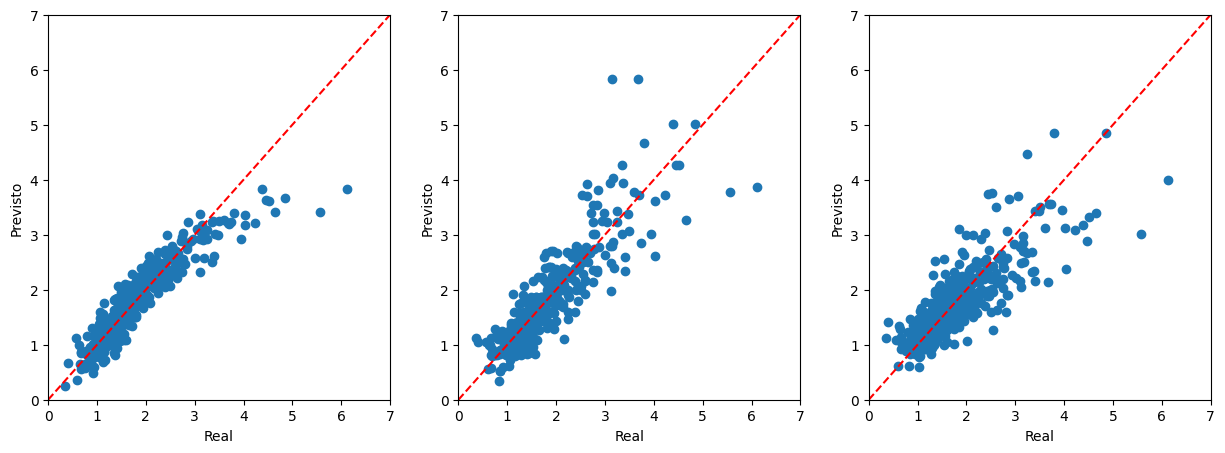

In [113]:
#Cria√ß√£o  do gr√°fico
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].scatter(y_test/100000,y_rl/100000)
ax[0].plot([0,700000], [0,700000], '--r')
ax[1].scatter(y_test/100000,y_ar/100000)
ax[1].plot([0,700000], [0,700000], '--r')
ax[2].scatter(y_test/100000,y_knn/100000)
ax[2].plot([0,700000], [0,700000], '--r')

ax[0].set(xlim=(0, 7), ylim=(0, 7))
ax[0].set_xlabel('Real')
ax[0].set_ylabel('Previsto')
ax[1].set(xlim=(0, 7), ylim=(0, 7))
ax[1].set_xlabel('Real')
ax[1].set_ylabel('Previsto')
ax[2].set(xlim=(0, 7), ylim=(0, 7))
ax[2].set_xlabel('Real')
ax[2].set_ylabel('Previsto')

utilizando a Regress√£o Linear por ter sido o algoritmo com menor erro quadr√°tico m√©dio, a mesma m√©trica avaliada pelo Kaggle na hora de classificar os modelos

## previs√£o para a base de teste da competi√ß√£o


retirou-se os valores vazios pois a regress√£o linear n√£o vai conseguir trabalhar com valores vazio
Se tentarmos usar essa base, ele vai retornar um erro dizendo que o input possui valores NaN
Podemos apenas substituir por -1 como fizemos acima

In [114]:
#importando base de teste
teste = pd.read_csv('test.csv')

In [115]:
teste.head(3)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  

[3 rows x 80 columns]

In [116]:
#limapndo colunas da base de treino
teste = teste.drop(eliminar, axis =1)

In [117]:
 #verificando colunas numericas
coluna2 = teste.columns[teste.dtypes != 'object']
coluna2

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [118]:
#mantendo apenas colunas numericas
teste = teste.loc[:,coluna2]

In [119]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   LotArea        1459 non-null   int64  
 3   OverallQual    1459 non-null   int64  
 4   OverallCond    1459 non-null   int64  
 5   YearBuilt      1459 non-null   int64  
 6   YearRemodAdd   1459 non-null   int64  
 7   MasVnrArea     1444 non-null   float64
 8   BsmtFinSF1     1458 non-null   float64
 9   BsmtFinSF2     1458 non-null   float64
 10  BsmtUnfSF      1458 non-null   float64
 11  TotalBsmtSF    1458 non-null   float64
 12  1stFlrSF       1459 non-null   int64  
 13  2ndFlrSF       1459 non-null   int64  
 14  LowQualFinSF   1459 non-null   int64  
 15  GrLivArea      1459 non-null   int64  
 16  BsmtFullBath   1457 non-null   float64
 17  BsmtHalfBath   1457 non-null   float64
 18  FullBath

In [120]:
#visualizando valores vazios
teste.isnull().sum().sort_values(ascending=False).head(10)

GarageYrBlt     78
MasVnrArea      15
BsmtHalfBath     2
BsmtFullBath     2
GarageCars       1
GarageArea       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFinSF1       1
dtype: int64

In [121]:
#substituindo valores vazios por -1
teste = teste.fillna(-1)

In [122]:
#previsao - regressao linear
y_pred = reg_rl.predict(teste)

In [123]:
#adicionando a coluna de previsao na base
teste['SalePrice'] = y_pred

In [124]:
#extra√ß√£o de id e saleprice
resultado = teste[['Id','SalePrice']]
resultado.head(3)

Id      SalePrice
0  1461  116408.261612
1  1462  125987.292978
2  1463  171859.023710

In [125]:
resultado.to_csv('submission.csv', index=False)

## Visualiza√ß√µes

Text(0.5, 1.0, '√Årea constru√≠da vs Pre√ßo de venda')

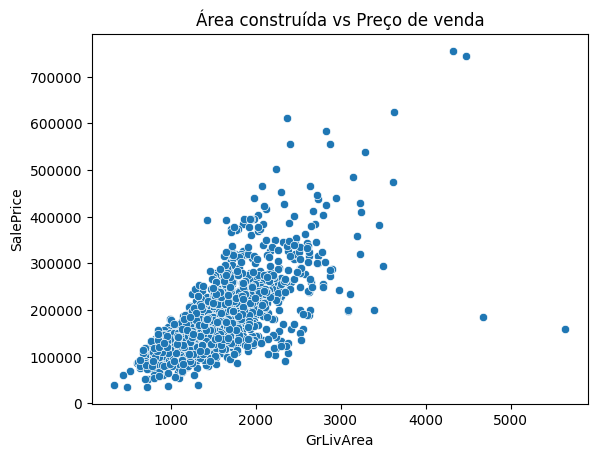

In [126]:
#Quanto maior a √°rea constru√≠da acima do solo, maior o pre√ßo de venda?
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_data)
plt.title('√Årea constru√≠da vs Pre√ßo de venda')


O gr√°fico acima mostra uma rela√ß√£o positiva entre o tamanho das casas (medido por `GrLivArea`) e seus respectivos pre√ßos (`SalePrice`). Observa-se que, de forma geral, quanto maior a √°rea constru√≠da, maior tende a ser o valor de venda, indicando que o tamanho do im√≥vel √© um fator importante na precifica√ß√£o. A maior concentra√ß√£o de pontos se d√° entre 1.000 e 2.500 p√©s quadrados e entre 100.000 e 300.000 d√≥lares, refletindo o perfil mais comum das casas analisadas. Apesar disso, existem alguns outliers, casas muito grandes ou muito caras, que se destacam e podem influenciar a performance de modelos preditivos, sendo recomend√°vel analis√°-los separadamente.

<Axes: title={'center': '√Årea constru√≠da vs Pre√ßo de venda (com linha de tend√™ncia)'}, xlabel='GrLivArea', ylabel='SalePrice'>

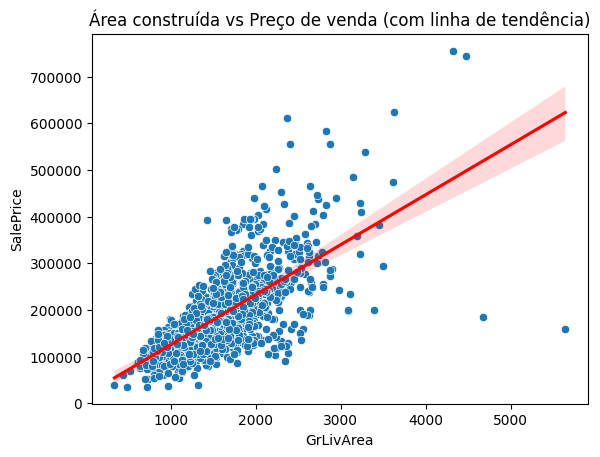

In [127]:
#Existe uma rela√ß√£o linear positiva entre o tamanho da casa e o pre√ßo.
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("√Årea constru√≠da vs Pre√ßo de venda (com linha de tend√™ncia)")
sns.regplot(x='GrLivArea', y='SalePrice', data=df, scatter=False, color='red')


A linha de tend√™ncia, quando adicionada ao gr√°fico de dispers√£o entre GrLivArea (√°rea constru√≠da) e SalePrice (pre√ßo de venda), representa a melhor reta que resume a rela√ß√£o entre as duas vari√°veis. Ela indica a dire√ß√£o geral dos dados e permite visualizar de forma clara que, conforme a √°rea constru√≠da aumenta, o pre√ßo de venda tamb√©m tende a crescer. Essa linha √© calculada com base em regress√£o linear e ajuda a identificar padr√µes, facilitando a previs√£o de pre√ßos. Al√©m disso, ela permite observar se os pontos est√£o bem distribu√≠dos ao redor dela ‚Äî o que indica um bom ajuste ‚Äî ou se h√° desvios significativos (res√≠duos), sugerindo a influ√™ncia de outras vari√°veis ou a presen√ßa de outliers. Em resumo, a linha de tend√™ncia serve como um guia visual para entender a for√ßa e o tipo de rela√ß√£o entre √°rea e pre√ßo no conjunto de dados.

Text(0.5, 1.0, 'Pre√ßo por Vizinhan√ßa')

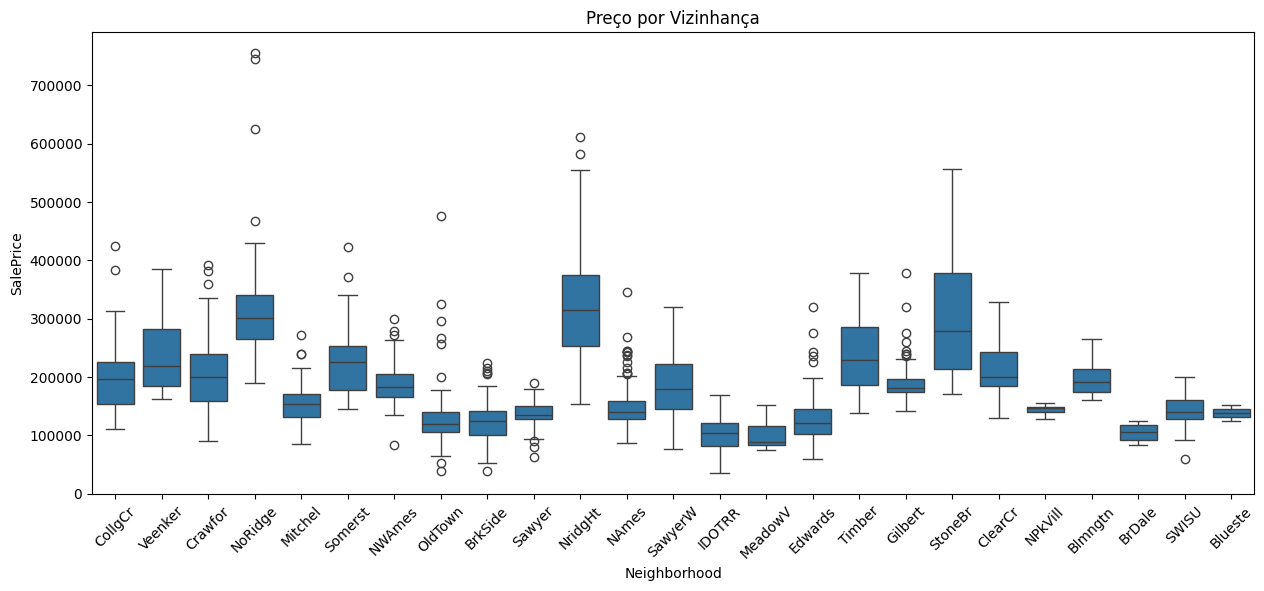

In [128]:
#Casas em determinados bairros t√™m pre√ßos sistematicamente mais altos
plt.figure(figsize=(15,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=train_data)
plt.xticks(rotation=45)
plt.title('Pre√ßo por Vizinhan√ßa')


O gr√°fico apresenta a varia√ß√£o dos pre√ßos de venda (SalePrice) das casas em diferentes bairros (Neighborhood) e evidencia como a localiza√ß√£o influencia significativamente o valor dos im√≥veis. Bairros como NoRidge, NridgHt e StoneBr se destacam por possu√≠rem pre√ßos medianos mais altos, indicando √°reas mais valorizadas, enquanto regi√µes como IDOTRR e BrDale concentram pre√ßos mais baixos. A altura das caixas revela a dispers√£o dos valores dentro de cada bairro, e os pontos fora delas representam outliers ‚Äî casas com pre√ßos muito acima ou abaixo da m√©dia local. Essa visualiza√ß√£o destaca que o bairro n√£o apenas afeta o pre√ßo m√©dio, mas tamb√©m a consist√™ncia dos valores, sendo uma vari√°vel essencial na modelagem preditiva do pre√ßo de im√≥veis.

Text(0.5, 1.0, 'Qualidade Geral vs Pre√ßo de Venda')

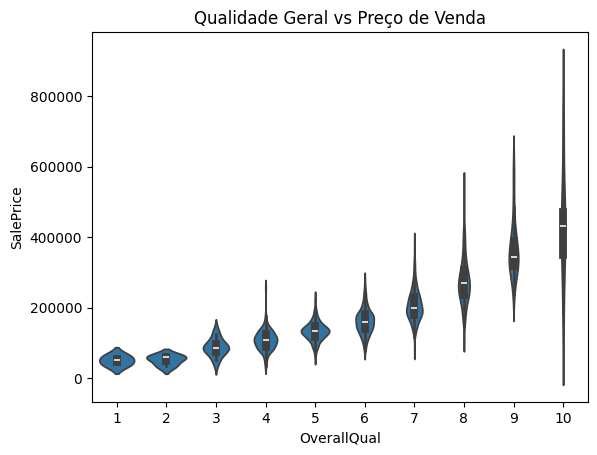

In [129]:
#Casas com melhor qualidade de constru√ß√£o valem mais?
sns.violinplot(x='OverallQual', y='SalePrice', data=train_data)
plt.title('Qualidade Geral vs Pre√ßo de Venda')


O gr√°fico mostra a rela√ß√£o entre a qualidade geral dos im√≥veis (OverallQual) e seus pre√ßos de venda (SalePrice), revelando uma forte correla√ß√£o positiva entre essas vari√°veis. √Ä medida que a nota de qualidade aumenta, observa-se tamb√©m um aumento consistente no valor dos im√≥veis, indicando que casas mais bem avaliadas tendem a ser significativamente mais caras. As faixas de qualidade mais baixas (de 1 a 4) concentram-se em pre√ßos menores e mais uniformes, enquanto as notas mais altas (principalmente de 8 a 10) apresentam n√£o apenas pre√ßos elevados, mas tamb√©m maior varia√ß√£o, refletindo im√≥veis de alto padr√£o com caracter√≠sticas variadas. A visualiza√ß√£o refor√ßa a import√¢ncia da qualidade geral como um dos principais fatores na defini√ß√£o do valor de mercado de uma casa.

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

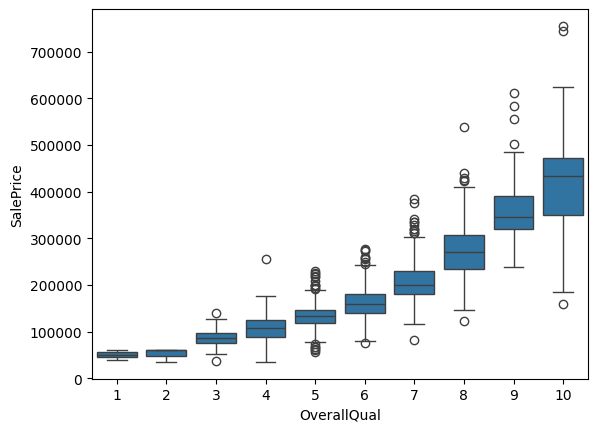

In [130]:
#Casas com maior qualidade de constru√ß√£o t√™m pre√ßos significativamente mais altos.
sns.boxplot(x='OverallQual', y='SalePrice', data=df)


O gr√°fico evidencia uma rela√ß√£o positiva entre a qualidade geral dos im√≥veis (`OverallQual`) e seus pre√ßos de venda (`SalePrice`), demonstrando que quanto maior a nota de qualidade, maior tende a ser o valor do im√≥vel. Observa-se um crescimento progressivo nos pre√ßos medianos √† medida que a qualidade aumenta, com destaque para as casas avaliadas com notas 9 e 10, que apresentam valores significativamente mais altos e grande dispers√£o. Essa variabilidade nos n√≠veis superiores sugere a presen√ßa de im√≥veis de luxo com caracter√≠sticas diferenciadas. J√° os im√≥veis com notas entre 5 e 6 concentram a maior parte das observa√ß√µes, indicando que a maioria das casas analisadas possui qualidade intermedi√°ria. Essa visualiza√ß√£o refor√ßa a import√¢ncia da qualidade da constru√ß√£o como um dos principais fatores de valoriza√ß√£o no mercado imobili√°rio.


Text(0.5, 1.0, 'Ano de Constru√ß√£o vs Pre√ßo de Venda')

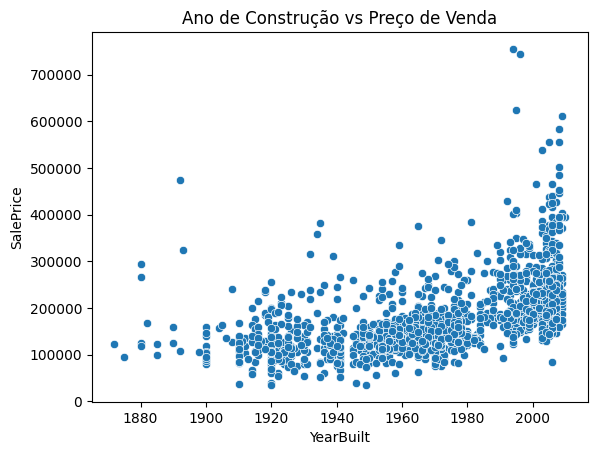

In [131]:
#Casas mais novas tendem a ser mais caras
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_data)
plt.title('Ano de Constru√ß√£o vs Pre√ßo de Venda')


O gr√°fico mostra que h√° uma rela√ß√£o clara entre o ano de constru√ß√£o dos im√≥veis (`YearBuilt`) e seus pre√ßos de venda (`SalePrice`), indicando que casas mais recentes tendem a ser vendidas por valores mais altos. Observa-se uma concentra√ß√£o de constru√ß√µes ap√≥s 1950, per√≠odo em que os pre√ßos come√ßam a subir gradualmente, com um aumento mais expressivo a partir dos anos 2000. Im√≥veis muito antigos, especialmente os constru√≠dos antes de 1940, apresentam pre√ßos mais baixos e pouca varia√ß√£o, enquanto os mais novos mostram maior dispers√£o e alguns valores elevados, refletindo constru√ß√µes modernas e de padr√£o superior. Esses padr√µes sugerem que o ano de constru√ß√£o √© uma vari√°vel relevante na previs√£o do pre√ßo de venda.


Text(0.5, 1.0, 'N√∫mero de Banheiros Completos vs Pre√ßo')

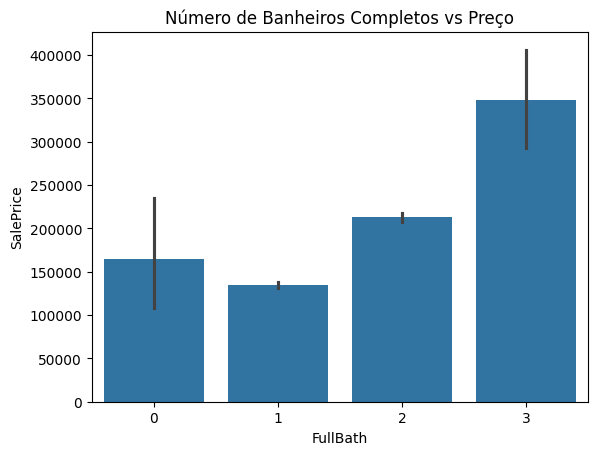

In [132]:
#Mais banheiros significam casas mais valorizadas?
sns.barplot(x='FullBath', y='SalePrice', data=train_data)
plt.title('N√∫mero de Banheiros Completos vs Pre√ßo')


O gr√°fico de barras mostra que o n√∫mero de banheiros completos (`FullBath`) est√° diretamente relacionado ao pre√ßo m√©dio de venda dos im√≥veis (`SalePrice`). De maneira geral, quanto maior a quantidade de banheiros completos, maior tende a ser o valor da casa, com destaque para im√≥veis com tr√™s banheiros, que apresentam os pre√ßos m√©dios mais altos. Casas com dois banheiros tamb√©m se destacam por estarem acima da m√©dia geral, enquanto aquelas com apenas um banheiro t√™m os menores valores m√©dios. Curiosamente, im√≥veis com zero banheiros completos possuem pre√ßos m√©dios superiores aos de um banheiro, o que pode indicar a presen√ßa de banheiros parciais ou outras caracter√≠sticas espec√≠ficas nesses im√≥veis. A tend√™ncia crescente refor√ßa que a quantidade de banheiros √© um importante indicador de conforto e valoriza√ß√£o do im√≥vel.


Text(0.5, 1.0, 'Capacidade da Garagem vs Pre√ßo')

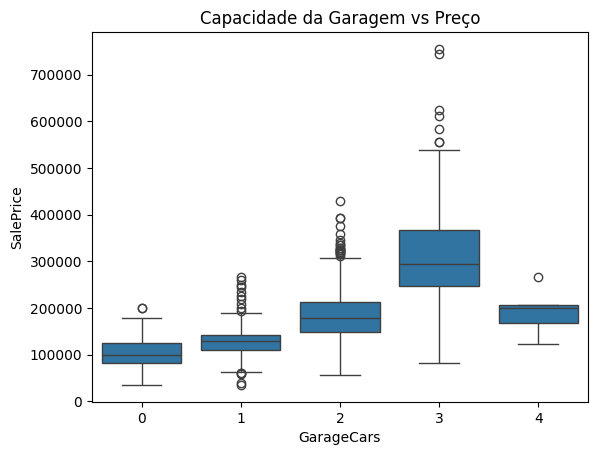

In [133]:
#Casas com garagens maiores s√£o mais caras
sns.boxplot(x='GarageCars', y='SalePrice', data=train_data)
plt.title('Capacidade da Garagem vs Pre√ßo')


O gr√°fico mostra que a capacidade da garagem (`GarageCars`) est√° relacionada ao pre√ßo de venda dos im√≥veis (`SalePrice`), evidenciando que casas com garagens maiores tendem a ter valores mais altos. Im√≥veis com capacidade para tr√™s carros se destacam com os maiores pre√ßos medianos e ampla varia√ß√£o, indicando um padr√£o de constru√ß√£o mais elevado. Casas com uma ou nenhuma vaga de garagem concentram os pre√ßos mais baixos, enquanto aquelas com duas vagas apresentam valores medianos intermedi√°rios e mais frequentes. Curiosamente, im√≥veis com quatro vagas n√£o seguem totalmente essa tend√™ncia, com mediana mais baixa, possivelmente devido √† baixa quantidade de observa√ß√µes ou influ√™ncia de outros fatores. De forma geral, a presen√ßa e o tamanho da garagem funcionam como um bom indicador do n√≠vel de valoriza√ß√£o do im√≥vel.


<Axes: xlabel='SalePrice', ylabel='Count'>

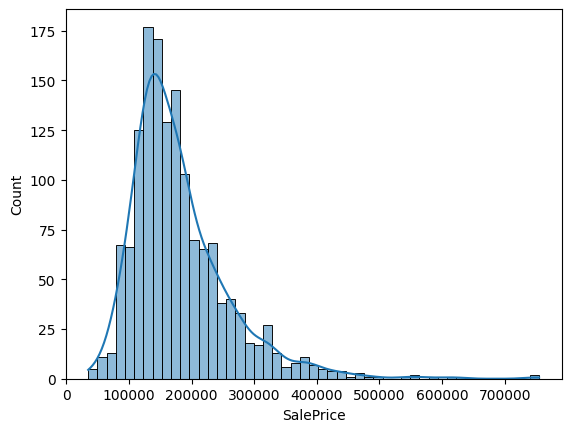

In [134]:
#sns.histplot(df['SalePrice'], kde=True)

sns.histplot(df['SalePrice'], kde=True)


O gr√°fico de histograma com curva de densidade mostra a distribui√ß√£o dos pre√ßos de venda dos im√≥veis (`SalePrice`) no conjunto de dados, revelando uma concentra√ß√£o significativa de casas com valores entre 100.000 e 200.000 d√≥lares. A distribui√ß√£o √© assim√©trica √† direita, com uma cauda longa indicando a presen√ßa de im√≥veis com pre√ßos elevados, embora menos frequentes. Esse comportamento sugere que a maioria dos im√≥veis possui pre√ßos acess√≠veis, enquanto apenas uma pequena parcela corresponde a casas de alto padr√£o. Essa assimetria √© comum em dados financeiros e indica que, para an√°lises estat√≠sticas mais precisas, pode ser vantajoso aplicar transforma√ß√µes como o logaritmo para aproximar a distribui√ß√£o de uma curva normal.


<Axes: >

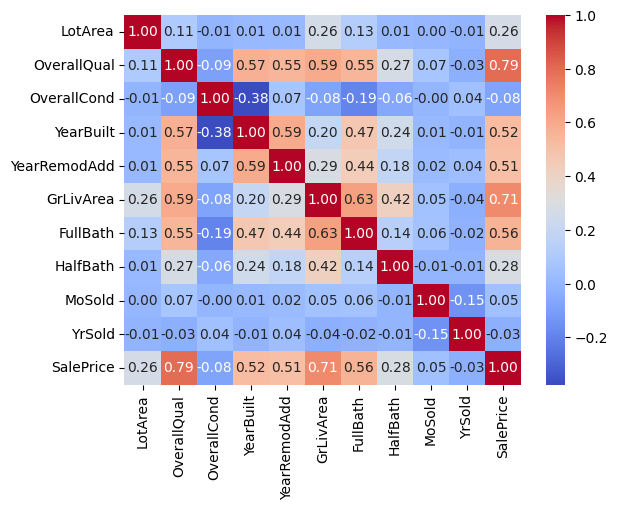

In [135]:
#Algumas vari√°veis est√£o altamente correlacionadas com SalePrice.
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")


O mapa de calor apresenta a correla√ß√£o entre vari√°veis num√©ricas do conjunto de dados, destacando aquelas que mais influenciam o pre√ßo de venda dos im√≥veis (`SalePrice`). As vari√°veis com maior correla√ß√£o positiva s√£o `OverallQual` (qualidade geral da constru√ß√£o), `GrLivArea` (√°rea √∫til) e `YearBuilt` (ano de constru√ß√£o), indicando que casas maiores, mais novas e de melhor qualidade tendem a ser mais valorizadas. J√° vari√°veis como `MoSold` (m√™s de venda) e `YrSold` (ano de venda) apresentam correla√ß√£o pr√≥xima de zero, sugerindo pouca influ√™ncia no pre√ßo final. A an√°lise tamb√©m revela interdepend√™ncia entre alguns atributos, como `YearBuilt` e `YearRemodAdd`, o que pode indicar redund√¢ncia de informa√ß√£o. Esse tipo de visualiza√ß√£o √© fundamental para orientar a sele√ß√£o de vari√°veis em modelos preditivos e entender os fatores mais relevantes para o valor de mercado dos im√≥veis.


<Axes: >

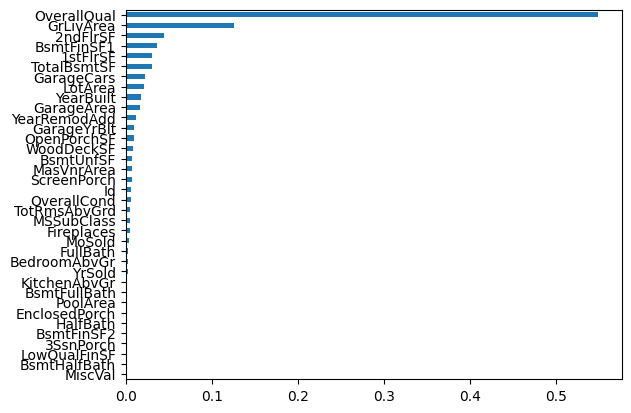

In [136]:
#Algumas vari√°veis t√™m impacto muito maior na previs√£o que outras.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(x_train, y_train)
pd.Series(model.feature_importances_, index=x_train.columns).sort_values().plot(kind='barh')


O gr√°fico apresenta a import√¢ncia das vari√°veis num√©ricas na predi√ß√£o do pre√ßo de venda dos im√≥veis (`SalePrice`), revelando que a qualidade geral da constru√ß√£o (`OverallQual`) √©, de longe, o fator mais influente no modelo, seguida pela √°rea √∫til acima do solo (`GrLivArea`) e pela metragem do segundo andar (`2ndFlrSF`). Vari√°veis relacionadas √† estrutura f√≠sica, como √°rea do por√£o acabado, n√∫mero de vagas na garagem e ano de constru√ß√£o, tamb√©m se destacam como elementos relevantes. Em contrapartida, atributos como n√∫mero de banheiros no por√£o, valor de itens diversos (`MiscVal`) e √°rea de acabamento de baixa qualidade possuem influ√™ncia praticamente nula. Essa an√°lise √© essencial para identificar quais caracter√≠sticas devem ser priorizadas em modelos preditivos e refor√ßa que qualidade e espa√ßo s√£o os principais determinantes do valor de mercado de um im√≥vel.


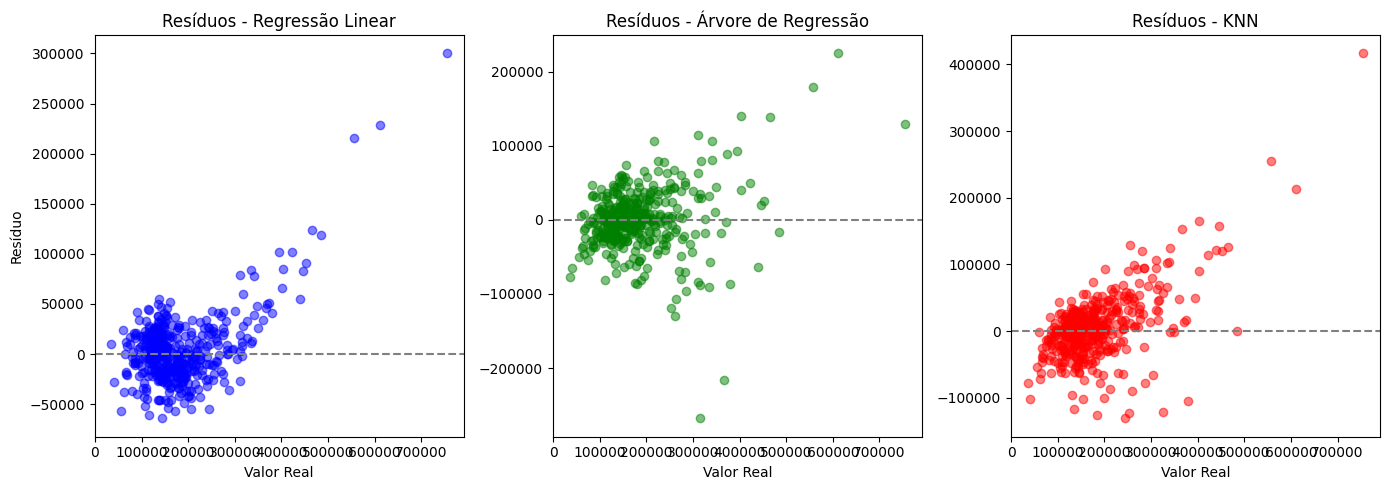

In [137]:

# Fazer previs√µes
y_rl = reg_rl.predict(x_test)
y_ar = reg_arv.predict(x_test)
y_knn = reg_knn.predict(x_test)

# Calcular res√≠duos
resid_rl = y_test - y_rl
resid_ar = y_test - y_ar
resid_knn = y_test - y_knn

# Plotar res√≠duos
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.scatter(y_test, resid_rl, alpha=0.5, color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Res√≠duos - Regress√£o Linear")
plt.xlabel("Valor Real")
plt.ylabel("Res√≠duo")

plt.subplot(1, 3, 2)
plt.scatter(y_test, resid_ar, alpha=0.5, color='green')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Res√≠duos - √Årvore de Regress√£o")
plt.xlabel("Valor Real")

plt.subplot(1, 3, 3)
plt.scatter(y_test, resid_knn, alpha=0.5, color='red')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Res√≠duos - KNN")
plt.xlabel("Valor Real")

plt.tight_layout()
plt.show()


O conjunto de gr√°ficos exibe a distribui√ß√£o dos res√≠duos para tr√™s modelos de regress√£o ‚Äî Linear, √Årvore de Regress√£o e KNN ‚Äî permitindo avaliar o desempenho preditivo de cada um. Observa-se que a Regress√£o Linear apresenta um padr√£o de res√≠duos em forma de funil, indicando que o modelo tende a errar mais √† medida que o valor real dos im√≥veis aumenta. A √Årvore de Regress√£o, por sua vez, concentra melhor os res√≠duos em torno de zero, mostrando-se mais flex√≠vel, embora ainda apresente outliers. J√° o modelo KNN demonstra maior dificuldade com im√≥veis de alto valor, gerando erros expressivos devido √† escassez de vizinhos semelhantes para compara√ß√£o. Em conjunto, os gr√°ficos sugerem que nenhum dos modelos atinge previs√µes perfeitamente consistentes e que abordagens mais sofisticadas ou ajustes nos dados podem ser necess√°rios para melhorar a precis√£o.


## Previs√£o

In [138]:
#Esse c√≥digo √© um exemplo completo de machine learning supervisionado com regress√£o, usando dados de im√≥veis para prever o pre√ßo de venda de uma casa com base em caracter√≠sticas fornecidas.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



df = pd.read_csv('train.csv')

# Selecionar features importantes
features = ['GrLivArea', 'OverallQual', 'YearBuilt', 'FullBath', 'GarageCars', 'Neighborhood']
target = 'SalePrice'
df = df[features + [target]].dropna()

# Separar em X e y
X = df[features]
y = df[target]

# Pr√©-processamento
categorical = ['Neighborhood']
numerical = ['GrLivArea', 'OverallQual', 'YearBuilt', 'FullBath', 'GarageCars']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
], remainder='passthrough')

# Pipeline com regress√£o linear
model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])

# Treinar modelo
model.fit(X, y)

# ----------------------------
# Entrada interativa do usu√°rio
# ----------------------------

print("\nDigite os dados da casa para prever o pre√ßo:")

# Capturar entradas do usu√°rio
grlivarea = float(input("√Årea √∫til da casa (em p√©s quadrados): "))
overallqual = int(input("Qualidade geral da casa (1 a 10): "))
yearbuilt = int(input("Ano de constru√ß√£o: "))
fullbath = int(input("N√∫mero de banheiros completos: "))
garagecars = int(input("N√∫mero de vagas de garagem: "))
neighborhood = input("Bairro (ex: CollgCr, NridgHt, OldTown...): ")

# Criar DataFrame com os dados
nova_casa = pd.DataFrame([{
    'GrLivArea': grlivarea,
    'OverallQual': overallqual,
    'YearBuilt': yearbuilt,
    'FullBath': fullbath,
    'GarageCars': garagecars,
    'Neighborhood': neighborhood
}])

# Prever pre√ßo
preco_previsto = model.predict(nova_casa)
print(f"\nüìà Pre√ßo estimado da casa: ${preco_previsto[0]:,.2f}")



Digite os dados da casa para prever o pre√ßo:
√Årea √∫til da casa (em p√©s quadrados): 3000
Qualidade geral da casa (1 a 10): 6
Ano de constru√ß√£o: 2024
N√∫mero de banheiros completos: 2
N√∫mero de vagas de garagem: 2
Bairro (ex: CollgCr, NridgHt, OldTown...): OldTown

üìà Pre√ßo estimado da casa: $261,278.03
